# Pre-ML Data Checklist & Preprocessing
This notebook follows the PreML Checklist to assess and prepare the dataset for machine learning.

Team Member: Nikhil Dhiman, Yamini Mandadi, Sudipta Bhatta, Akash Saraf, Jaydeep Dhirubhai Gondaliya, Saurabh Wankhade

## *Overview of the dataset*

The ISIC 2024 Skin Cancer Detection dataset is part of the International Skin Imaging Collaboration (ISIC) challenge on kaggle. Link to the data: https://www.kaggle.com/competitions/isic-2024-challenge/data. This dataset is specifically designed for the detection of skin cancer, containing images of skin lesions. These images have been gathered from healthcare organizations. The dataset features images with various labels indicating the presence or absence of skin cancer, as well as other key characteristics of the skin lesions. The images are primarily used to train machine learning models to automatically classify skin cancer from images, facilitating early diagnosis and improving patient outcomes.

## *Data Source and Collection Process*

Source of the data: https://www.kaggle.com/competitions/isic-2024-challenge/data. As per the website, the dataset was collected by the ISIC Foundation, a global collaborative effort focused on advancing skin cancer detection. The images were sourced from various clinical settings, and all data was anonymized to ensure patient privacy. These images are accompanied by metadata that includes lesion labels, lesion characteristics, and other relevant diagnostic information. The dataset is provided on Kaggle as part of the ISIC 2024 Skin Cancer Detection Challenge, which aims to benchmark various machine learning models for skin cancer detection.

- Data Completeness: Check for missing values, duplicates, and incorrect entries.
- Representativeness: Evaluate if the dataset represents different subgroups.
- Bias & Fairness: Check for potential biases in data labeling and distribution.
- Privacy Considerations: Discuss any privacy concerns in the dataset.
- Labeling Consistency: Ensure labels are accurate and consistent.

Acknowledgments:

Canfield Scientific manufacturers the Vectra WB360 device and specifically developed the software for extracting images from 3D TBP for use in this competition. We also thank Canfield for supporting the competition prizes.

The Shore Family Foundation
The competition hosts thank the Shore Family Foundation for their support of the ISIC Archive.

The following institutions contributed data for this competition
Memorial Sloan Kettering Cancer Center, New York, USA
Dermatology Service, Melanoma Unit, Hospital Clínic de Barcelona, IDIBAPS, Universitat de Barcelona, Barcelona, Spain, ITOBOS
The University of Queensland, Brisbane, Australia
FNQH Cairns, Westcourt, Australia
Melanoma Institute Australia, Sydney, Australia
Department of Dermatology at the University Hospital of Basel, Basel, Switzerland
Department of Dermatology, Medical University of Vienna, Vienna, Austria
Department of Dermatology, University of Athens Medical School, Athens, Greece
Monash University at the Alfred Hospital, Melbourne, Australia

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import cv2
import glob
import os
from collections import Counter
from PIL import Image

sns.set(style="whitegrid")

## Loading the Dataset

In [ ]:
metadata = pd.read_csv("train-metadata.csv", low_memory=False)

## 1. Data Overview

In [ ]:
print("🔍 Data Info:")
metadata.info()

print("\n📊 Data Description:")
print(metadata.describe(include='all'))

print("\n📋 Sample Data:")
print(metadata.head())

🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   4

In [ ]:
# 10 malignant samples and 10 benign samples
malignant_samples = metadata[metadata['target'] == 1].sample(10)
benign_samples = metadata[metadata['target'] == 0].sample(10)

##  2. Missing Values

Missing Values per Column:
isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        

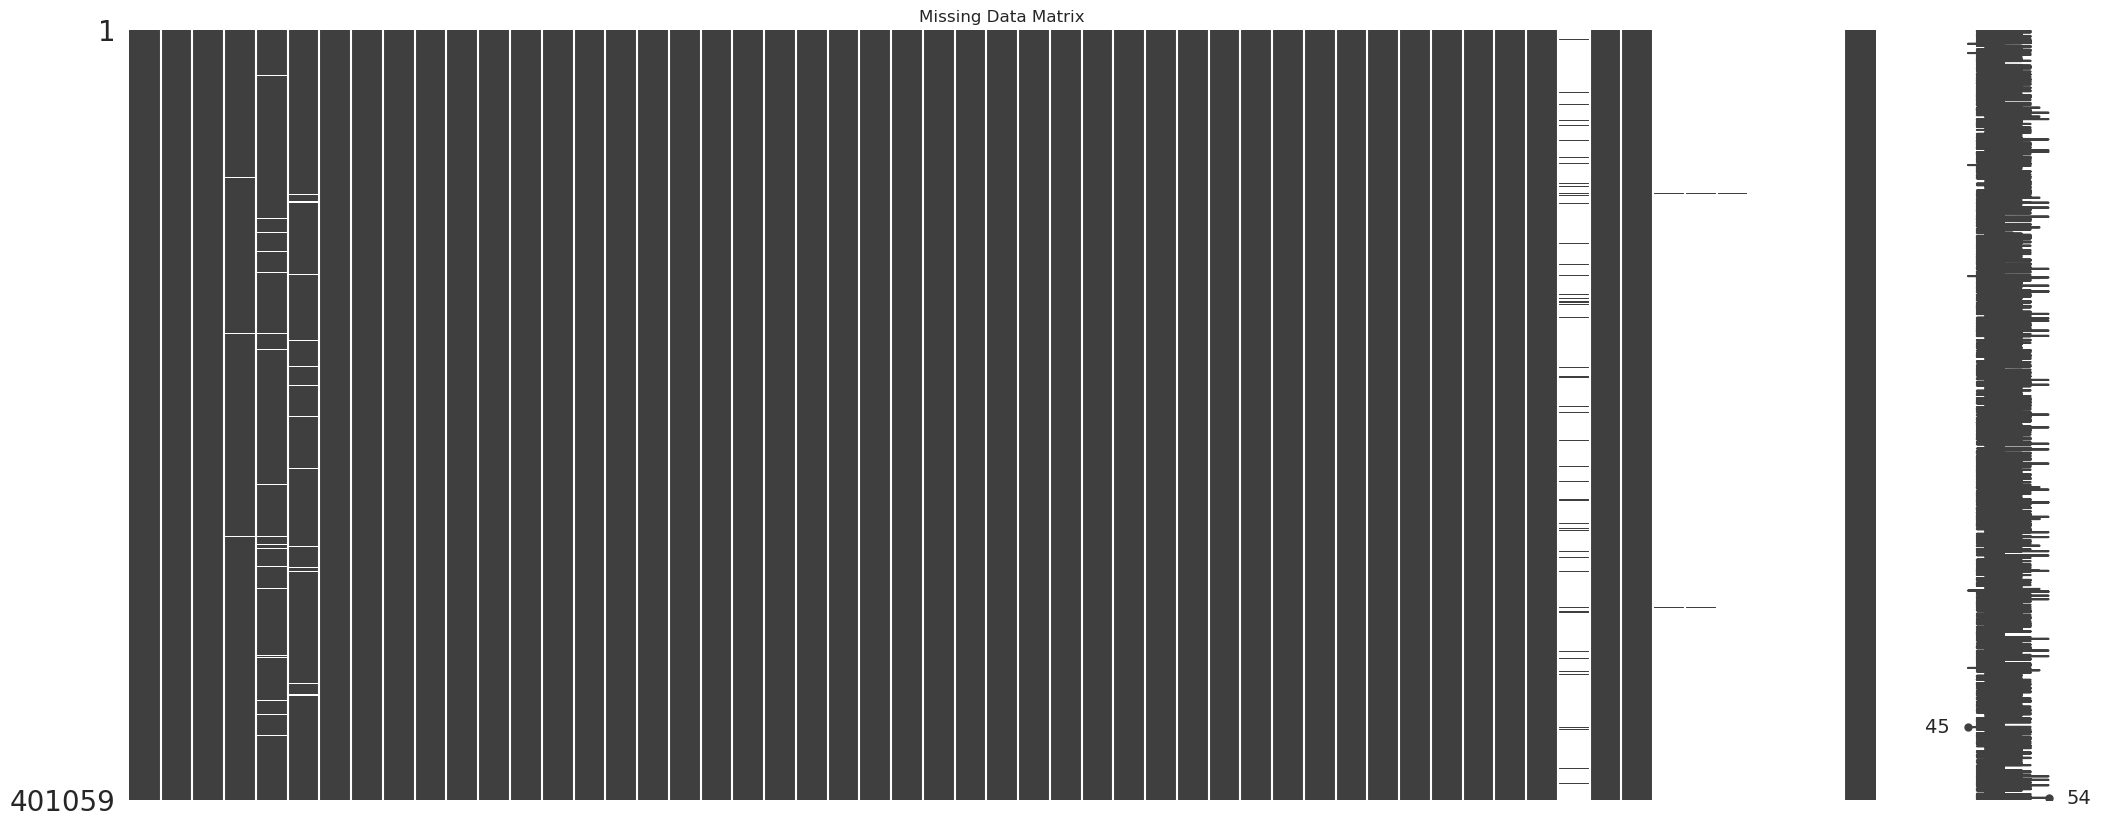

In [ ]:
print("Missing Values per Column:")
print(metadata.isnull().sum())

# Visualize missing data
msno.matrix(metadata)
plt.title("Missing Data Matrix")
plt.show()

## 3. Duplicate Check

In [ ]:
print("Duplicate Rows:")
print(metadata.duplicated().sum())

Duplicate Rows:
0


##  4. Class Balance (For Classification Tasks)

Class Distribution:
target
0    400666
1       393
Name: count, dtype: int64


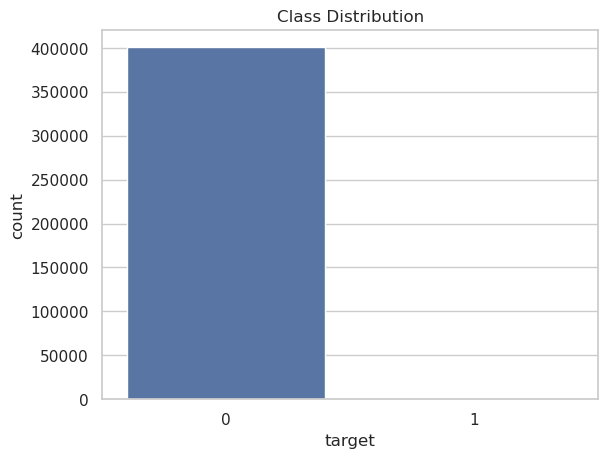

In [ ]:
if 'target' in metadata.columns:
    print("Class Distribution:")
    print(metadata['target'].value_counts())

    sns.countplot(x='target', data=metadata)
    plt.title("Class Distribution")
    plt.show()

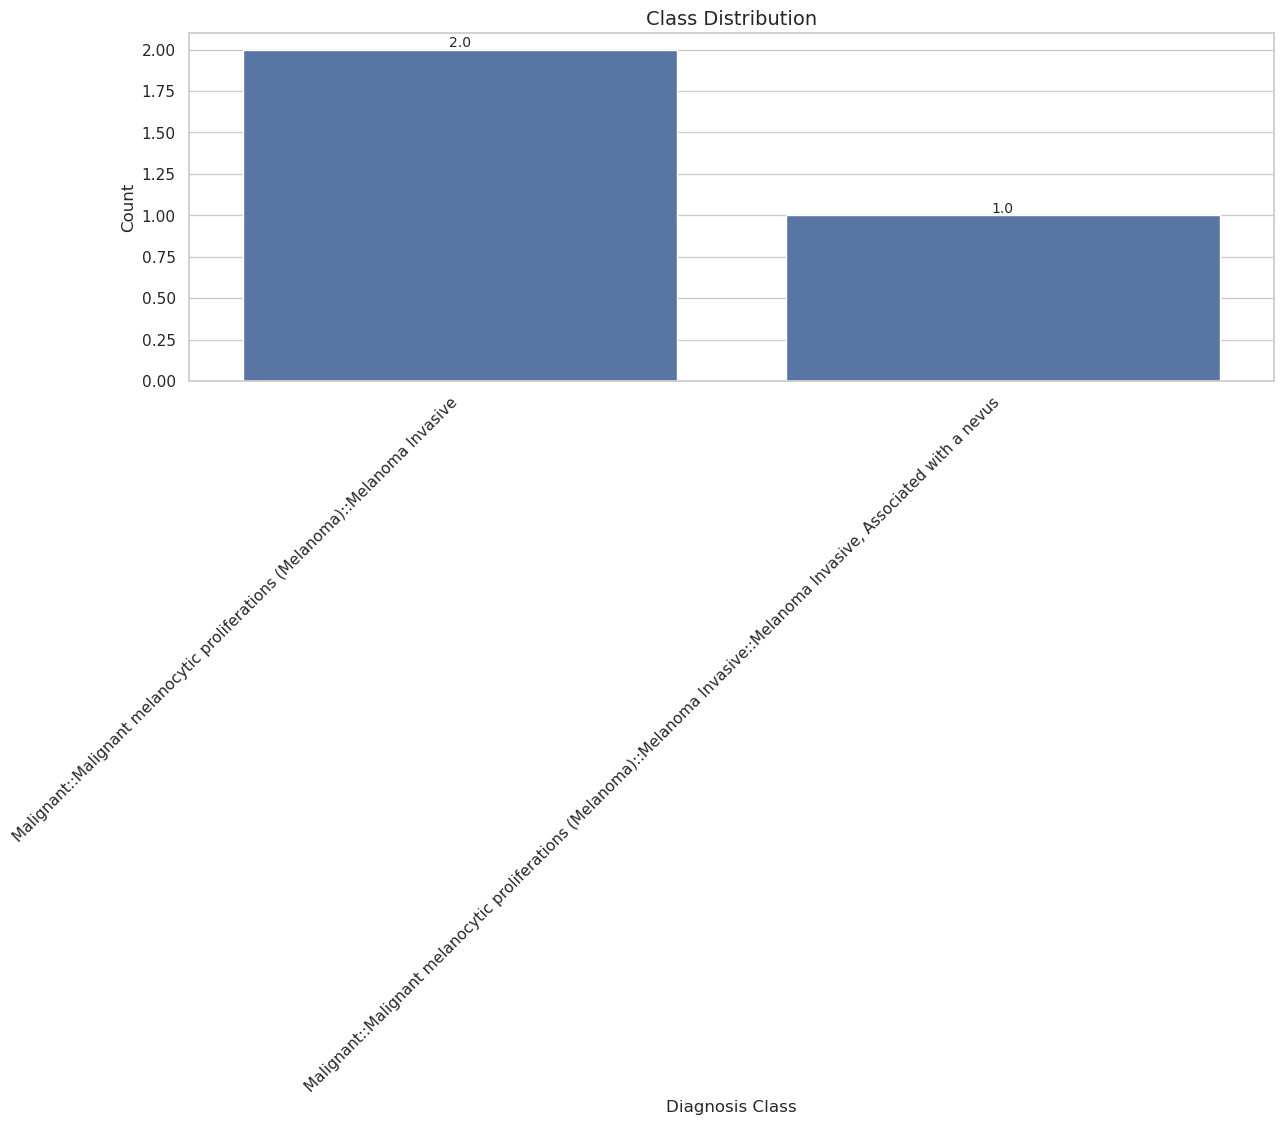

Class Distribution Percentages:
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive: 66.67%
Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Associated with a nevus: 33.33%


In [ ]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(x="iddx_full", data=metadata)
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Diagnosis Class", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45, ha='right')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.subplots_adjust(bottom=0.3)  # Add extra space for x-axis labels
plt.show()

# Class distribution percentages
class_distribution = metadata["iddx_full"].value_counts(normalize=True) * 100
print("Class Distribution Percentages:")
for class_name, percentage in class_distribution.items():
    print(f"{class_name}: {percentage:.2f}%")


## 5. Feature Distributions

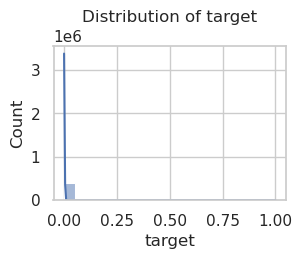

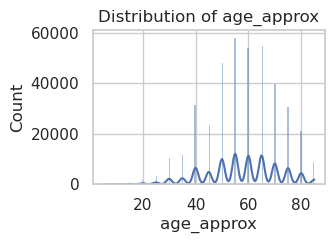

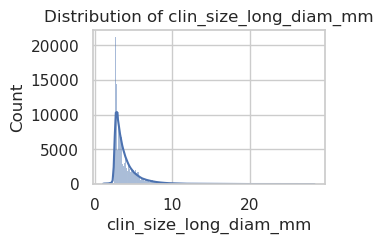

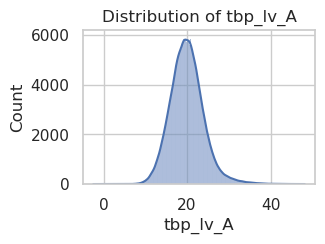

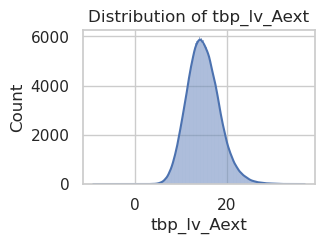

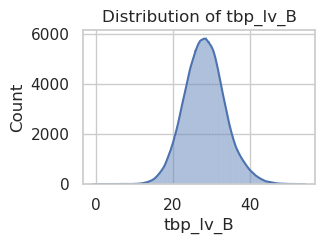

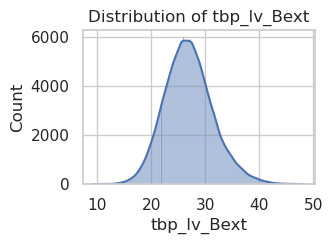

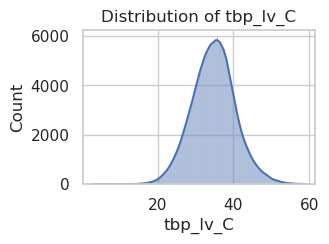

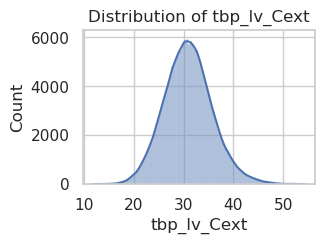

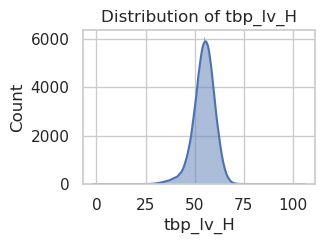

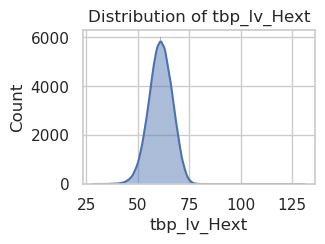

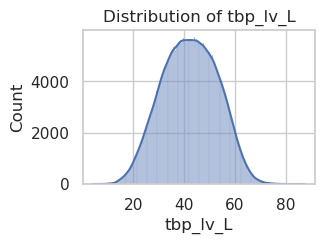

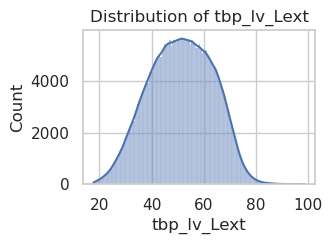

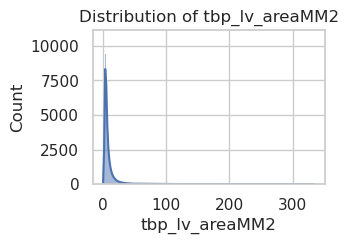

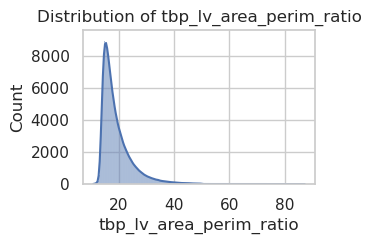

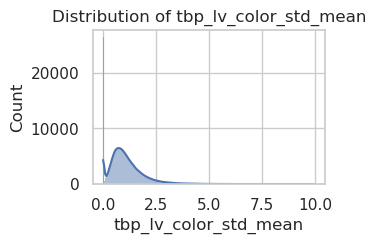

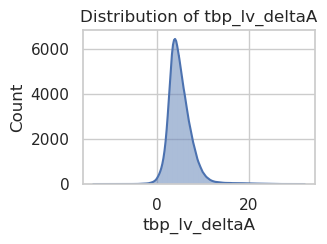

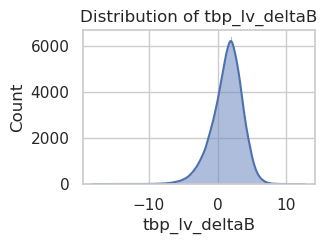

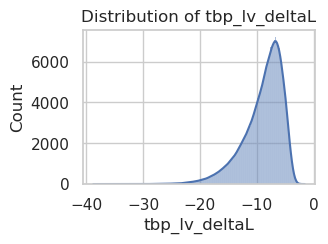

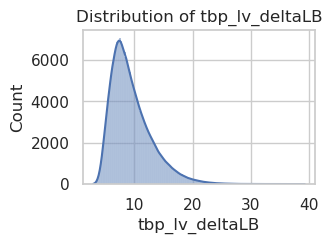

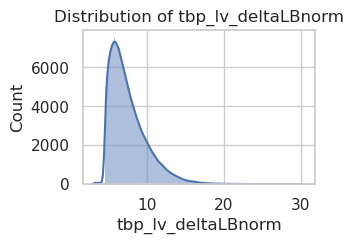

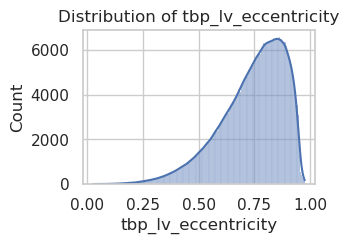

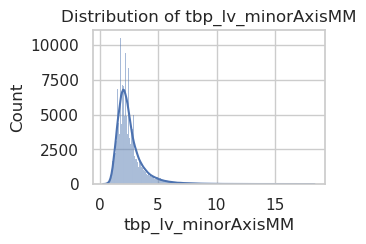

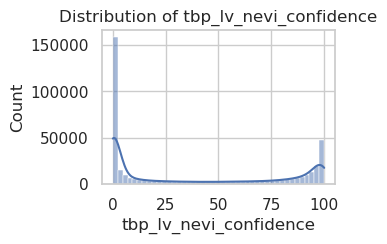

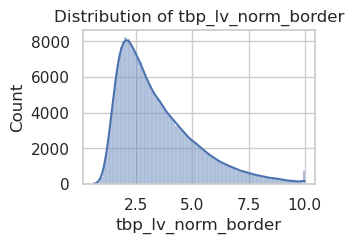

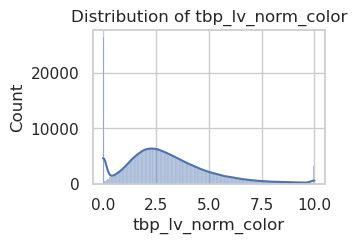

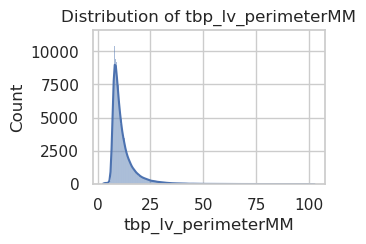

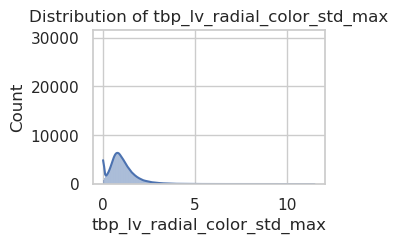

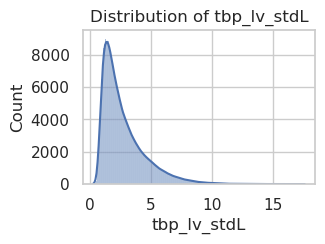

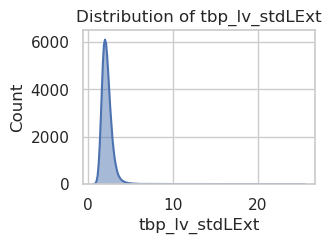

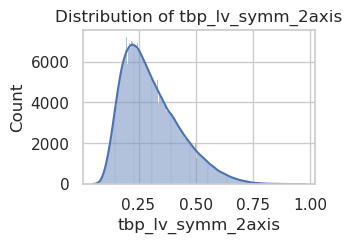

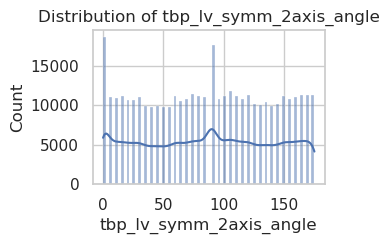

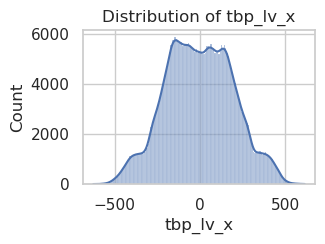

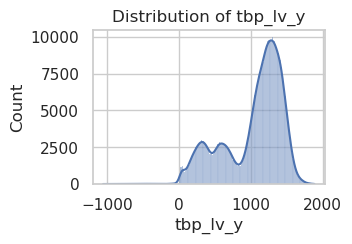

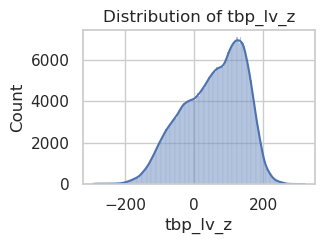

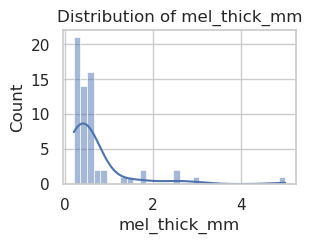

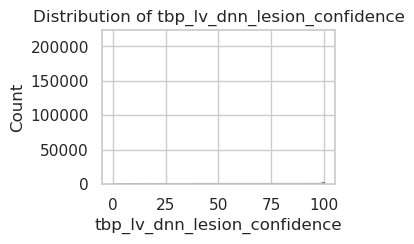

In [ ]:
numeric_cols = metadata.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(3, 2))
    sns.histplot(metadata[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 6. Outlier Detection and Removal (IQR Method)

In [ ]:
# Outlier removal with safety check
def remove_outliers_iqr(df, column):
    if df[column].nunique() < 2:
        return df  # Skip columns with constant values or only NaNs
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0:
        return df  # No outliers if no spread
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal only to numeric columns
for col in numeric_cols:
    before = len(metadata)
    metadata = remove_outliers_iqr(metadata, col)
    after = len(metadata)
    print(f"Removed {before - after} outliers from {col}")


Removed 0 outliers from target
Removed 3443 outliers from age_approx
Removed 27106 outliers from clin_size_long_diam_mm
Removed 7658 outliers from tbp_lv_A
Removed 2522 outliers from tbp_lv_Aext
Removed 3933 outliers from tbp_lv_B
Removed 2334 outliers from tbp_lv_Bext
Removed 1038 outliers from tbp_lv_C
Removed 603 outliers from tbp_lv_Cext
Removed 5931 outliers from tbp_lv_H
Removed 1056 outliers from tbp_lv_Hext
Removed 59 outliers from tbp_lv_L
Removed 9 outliers from tbp_lv_Lext
Removed 20894 outliers from tbp_lv_areaMM2
Removed 14578 outliers from tbp_lv_area_perim_ratio
Removed 10507 outliers from tbp_lv_color_std_mean
Removed 4848 outliers from tbp_lv_deltaA
Removed 5320 outliers from tbp_lv_deltaB
Removed 5422 outliers from tbp_lv_deltaL
Removed 742 outliers from tbp_lv_deltaLB
Removed 4367 outliers from tbp_lv_deltaLBnorm
Removed 5120 outliers from tbp_lv_eccentricity
Removed 2961 outliers from tbp_lv_minorAxisMM
Removed 0 outliers from tbp_lv_nevi_confidence
Removed 1984 out

## 7. Normalization (Min-Max Scaling)

In [ ]:
# Only normalize if DataFrame is non-empty
if not metadata.empty:
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    metadata[numeric_cols] = scaler.fit_transform(metadata[numeric_cols])
    print("✅ Normalized Numeric Columns:")
    print(metadata[numeric_cols].head())
else:
    print("⚠️ Skipping normalization: dataset is empty after outlier removal.")


✅ Normalized Numeric Columns:
        target  age_approx  clin_size_long_diam_mm  tbp_lv_A  tbp_lv_Aext  \
87386      0.0         1.0                1.000000   0.92585     0.000000   
193936     0.0         0.0                0.000000   1.00000     1.000000   
238076     0.0         0.5                0.615385   0.00000     0.195098   

        tbp_lv_B  tbp_lv_Bext  tbp_lv_C  tbp_lv_Cext  tbp_lv_H  ...  \
87386   0.835928     0.868402  0.848053     0.717168  0.832883  ...   
193936  1.000000     1.000000  1.000000     1.000000  1.000000  ...   
238076  0.000000     0.000000  0.000000     0.000000  0.000000  ...   

        tbp_lv_radial_color_std_max  tbp_lv_stdL  tbp_lv_stdLExt  \
87386                      1.000000     1.000000        0.000000   
193936                     0.000000     0.000000        0.964284   
238076                     0.900044     0.652634        1.000000   

        tbp_lv_symm_2axis  tbp_lv_symm_2axis_angle  tbp_lv_x  tbp_lv_y  \
87386            0.000000    

## 8. Correlation Heatmap

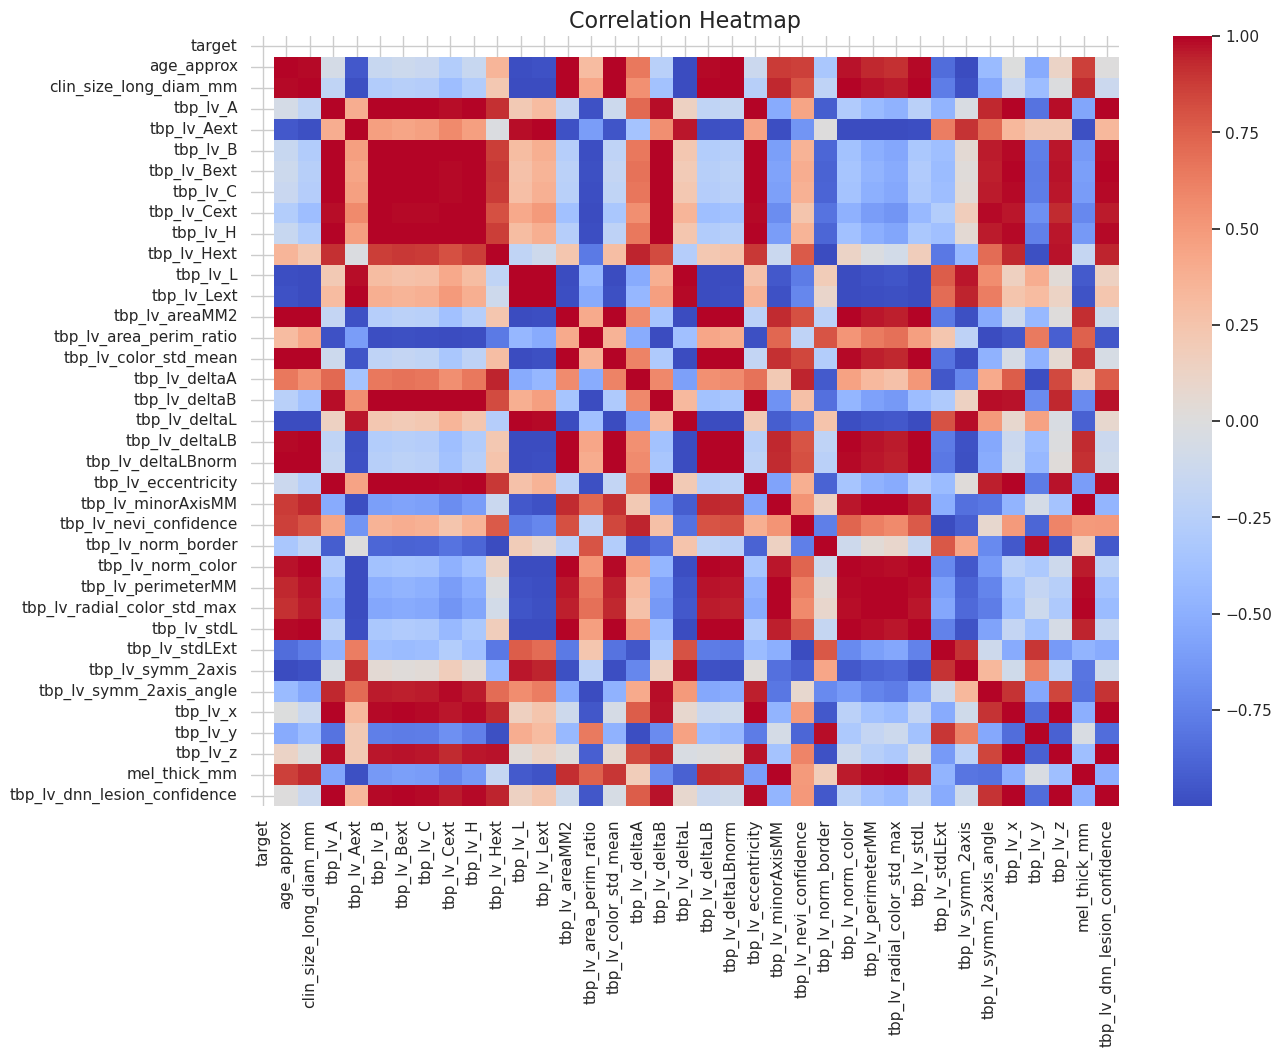

In [ ]:
plt.figure(figsize=(14, 10))  # Bigger figure
sns.heatmap(metadata[numeric_cols].corr(), annot=False, cmap='coolwarm')  # Remove text annotations
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Keep y-axis readable
plt.show()


## 9. Save Cleaned Dataset

In [ ]:
metadata.to_csv("cleaned_metadata.csv", index=False)
print("Cleaned dataset saved as 'cleaned_metadata.csv'")

Cleaned dataset saved as 'cleaned_metadata.csv'


In [ ]:
paths = glob.glob("train-image/image/*")

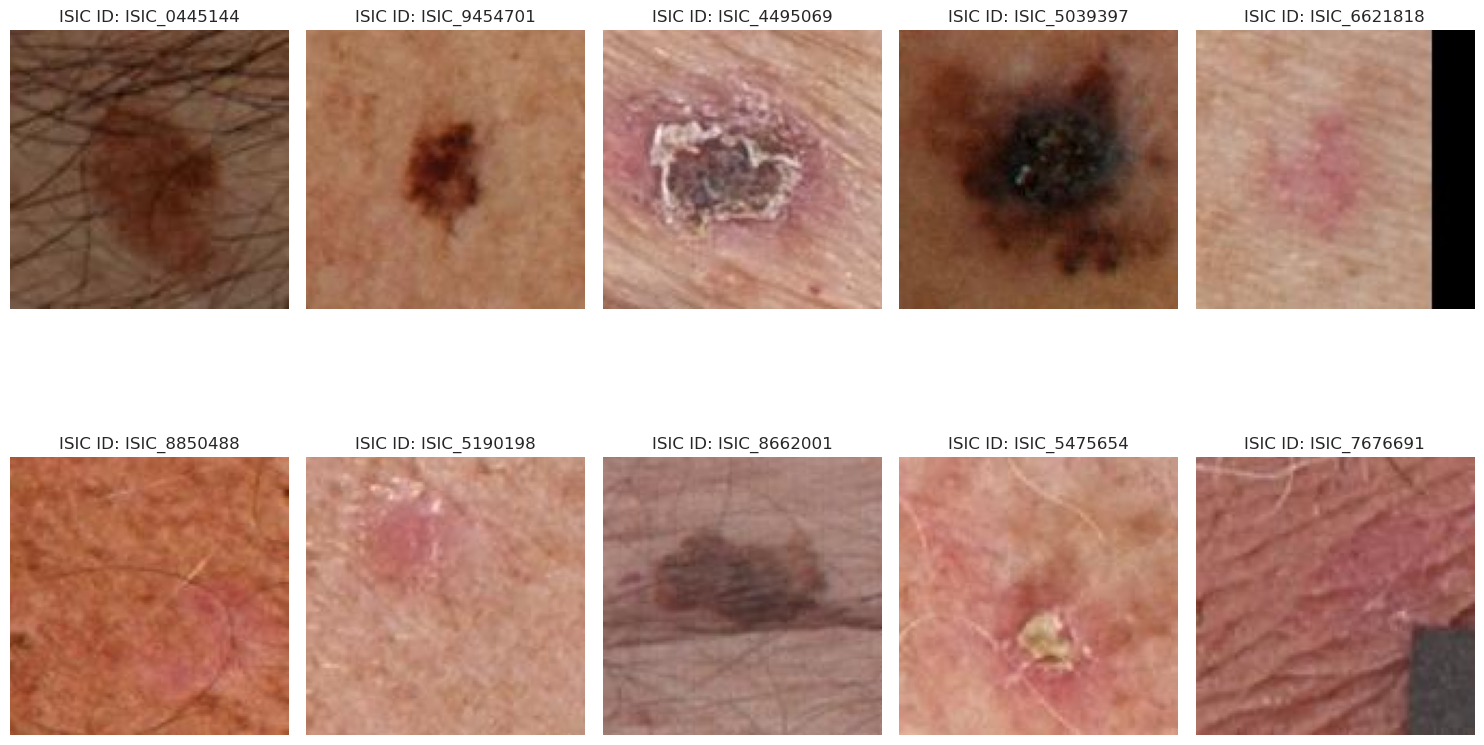

In [ ]:
# malignant samples plot
plt.figure(figsize=(15, 10))
j = 0
for i, row in malignant_samples.iterrows():
    image_path = f"train-image/image/{row['isic_id']}.jpg"
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, j + 1)
    plt.imshow(image)
    plt.title(f"ISIC ID: {row['isic_id']}")
    plt.axis('off')
    j += 1
plt.tight_layout()
plt.show()

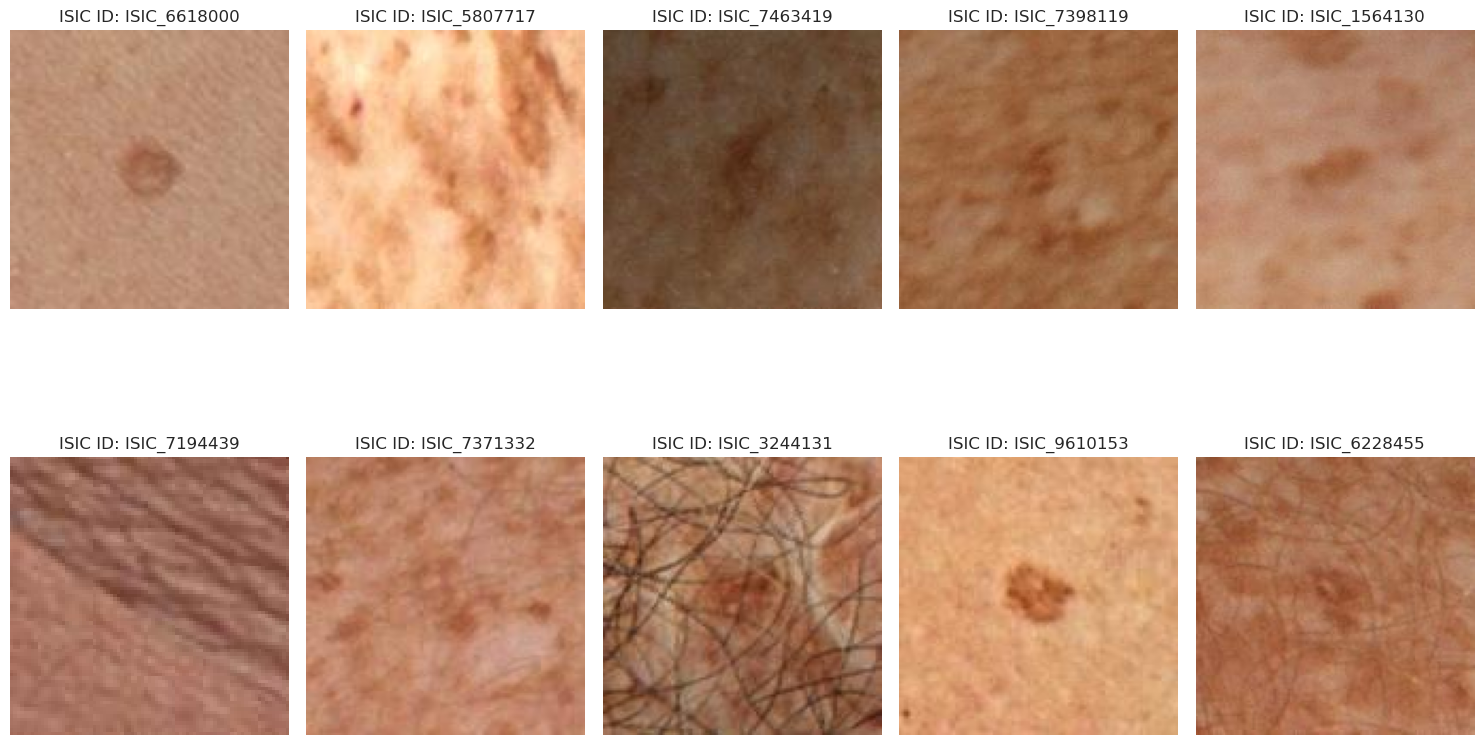

In [ ]:
# benign samples plot
plt.figure(figsize=(15, 10))
j = 0
for i, row in benign_samples.iterrows():
    image_path = f"train-image/image/{row['isic_id']}.jpg"
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, j + 1)
    plt.imshow(image)
    plt.title(f"ISIC ID: {row['isic_id']}")
    plt.axis('off')
    j += 1
plt.tight_layout()
plt.show()

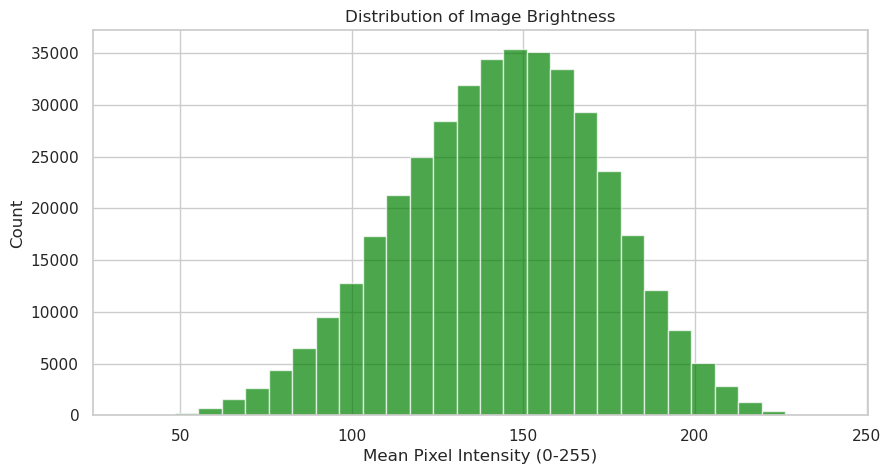

In [ ]:
# distribution of pixel intensity
import numpy as np
pixel_means = []

for img_path in paths:

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is not None:
        pixel_means.append(np.mean(img))  # Compute mean pixel intensity

plt.figure(figsize=(10, 5))
plt.hist(pixel_means, bins=30, color='green', alpha=0.7)
plt.xlabel('Mean Pixel Intensity (0-255)')
plt.ylabel('Count')
plt.title('Distribution of Image Brightness')
plt.show()

In [ ]:
normalized_images = []
image_directory = "train-image/image/"
target_size = (224, 224)  # or any consistent shape you need

for index, row in metadata.iterrows():
    image_path = os.path.join(image_directory, f"{row['isic_id']}.jpg")
    image = cv2.imread(image_path)

    if image is not None:
        # Resize image to target size
        image = cv2.resize(image, target_size)

        # Normalize pixel values
        normalized_image = image / 255.0

        normalized_images.append(normalized_image)

# Now this should work without error
normalized_images = np.array(normalized_images)


Furthermore, during training, if we end up using pre trained models, we can also normalize the images using the pre-trained model's mean and standard deviation values.

In [ ]:
# Store properties
image_shapes = []
aspect_ratios = []
corrupt_files = []

# Iterate through images
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_directory, filename)
        try:
            img = Image.open(img_path)
            width, height = img.size
            image_shapes.append((width, height))
            aspect_ratios.append(round(width / height, 2))
        except:
            corrupt_files.append(filename)

# Create counters
shape_counts = Counter(image_shapes)
aspect_counts = Counter(aspect_ratios)

# Display top 10 shapes and aspect ratios only
print("🔢 Top 10 Unique Image Sizes:")
for shape, count in shape_counts.most_common(10):
    print(f"{shape}: {count} images")

print("\n📐 Top 10 Aspect Ratios:")
for ratio, count in aspect_counts.most_common(10):
    print(f"{ratio}: {count} images")

print(f"\n🚫 Corrupt files found: {len(corrupt_files)}")
if corrupt_files:
    print("Examples:", corrupt_files[:5])


🔢 Top 10 Unique Image Sizes:
(133, 133): 21049 images
(131, 131): 20906 images
(129, 129): 20379 images
(135, 135): 20364 images
(127, 127): 19256 images
(137, 137): 18927 images
(125, 125): 18257 images
(123, 123): 16965 images
(139, 139): 16963 images
(121, 121): 15620 images

📐 Top 10 Aspect Ratios:
1.0: 401059 images

🚫 Corrupt files found: 0


### ✅ Summary & Findings

In this section, we summarize the key observations from the dataset and the preprocessing steps.

**Dataset Overview:**  
The ISIC 2024 Skin Cancer Detection dataset includes high-resolution images of skin lesions labeled as either benign (0) or malignant (1). Each image is associated with metadata such as `age_approx`, `lesion_size`, and `asymmetry_index`. This dataset is well-suited for training machine learning models to aid in early detection of skin cancer.

**Missing Data:**  
Missing values were inspected using `.isnull().sum()` and visualized with a missing data matrix. While no automated filling or removal was applied, visual inspection suggested some missing values in non-critical columns. Further handling may be required depending on model design.

**Class Distribution:**  
The dataset exhibits class imbalance:  
-- *Benign (0):* 400666 samples  
-- *Malignant (1):* 393 samples  

In addition, the `iddx_full` column shows multiple diagnosis subtypes, with visualizations confirming that some classes dominate more than others. This imbalance needs to be considered during model training to avoid bias.

**Outliers:**  
Outliers in numeric metadata were handled using the IQR (Interquartile Range) method. This removed extreme values while preserving the integrity of the overall distribution.

**Data Normalization:**  
- **Metadata:** Min-Max normalization was applied to numeric columns such as `age_approx`, `lesion_size`, and `asymmetry_index`.  
- **Images:** All image pixel values were normalized by dividing by 255.0 and resized to a uniform shape, enabling compatibility with deep learning models.

**Image Processing:**  
Images were successfully read using OpenCV, resized (e.g., to 224×224), and converted to floating-point values in the [0, 1] range. This prepares them for input into convolutional neural networks.

---

### 🧠 Conclusion

The dataset is clean, diverse, and well-prepared for machine learning and deep learning pipelines. However, the following points must be addressed before modeling:

- Handle class imbalance using techniques like oversampling, undersampling, or class weights.
- Optionally address missing values in non-critical metadata columns.
- Apply further normalization (e.g., mean/std) if using pretrained models.
- Consider data augmentation to improve generalization, especially for underrepresented classes.

With these considerations in place, the dataset offers a strong foundation for developing robust skin cancer detection models.
